<a href="https://colab.research.google.com/github/LGM-kr/math1/blob/main/%20%EA%B8%B0%EC%83%81%20%EB%B0%8F%20%EC%B6%95%EC%82%AC%20%ED%99%98%EA%B2%BD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EC%8A%A4%EB%A7%88%ED%8A%B8%EC%B6%95%EC%82%B0%20%EC%97%B4%20%EC%8A%A4%ED%8A%B8%EB%A0%88%EC%8A%A4%20%EC%9C%84%ED%97%98%20%EC%98%88%EC%B8%A1%20%EB%AA%A8%EB%8D%B8_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab 환경 감지: 한글 폰트를 설치합니다...
✅ 라이브러리 로드 및 폰트 설정 완료.
⏳ 데이터 다운로드 및 처리 준비 중...
⬇️ 다운로드 시작: ICT데이터 환경관리기.xlsx...
✅ 다운로드 완료: ICT데이터 환경관리기.xlsx
⬇️ 다운로드 시작: ICT데이터 환경제어기.xlsx...
✅ 다운로드 완료: ICT데이터 환경제어기.xlsx
⬇️ 다운로드 시작: OBS_ASOS_TIM.zip...
✅ 다운로드 완료: OBS_ASOS_TIM.zip
📦 압축 해제 중: OBS_ASOS_TIM.zip...
✅ 압축 해제 완료. CSV 파일 발견: OBS_ASOS_TIM.csv


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ 데이터 전처리 완료: 총 19594건의 데이터가 준비되었습니다.
✅ THI 계산 및 위험 라벨링 완료.
라벨 분포:
 Risk_Label
0    12222
1     4268
2      776
3     2328
Name: count, dtype: int64

📊 [모델 성능 요약]
 - Naive Bayes 정확도: 0.9678
 - Logistic Regression 정확도: 0.9678
 - Cross Entropy Loss: 0.0492


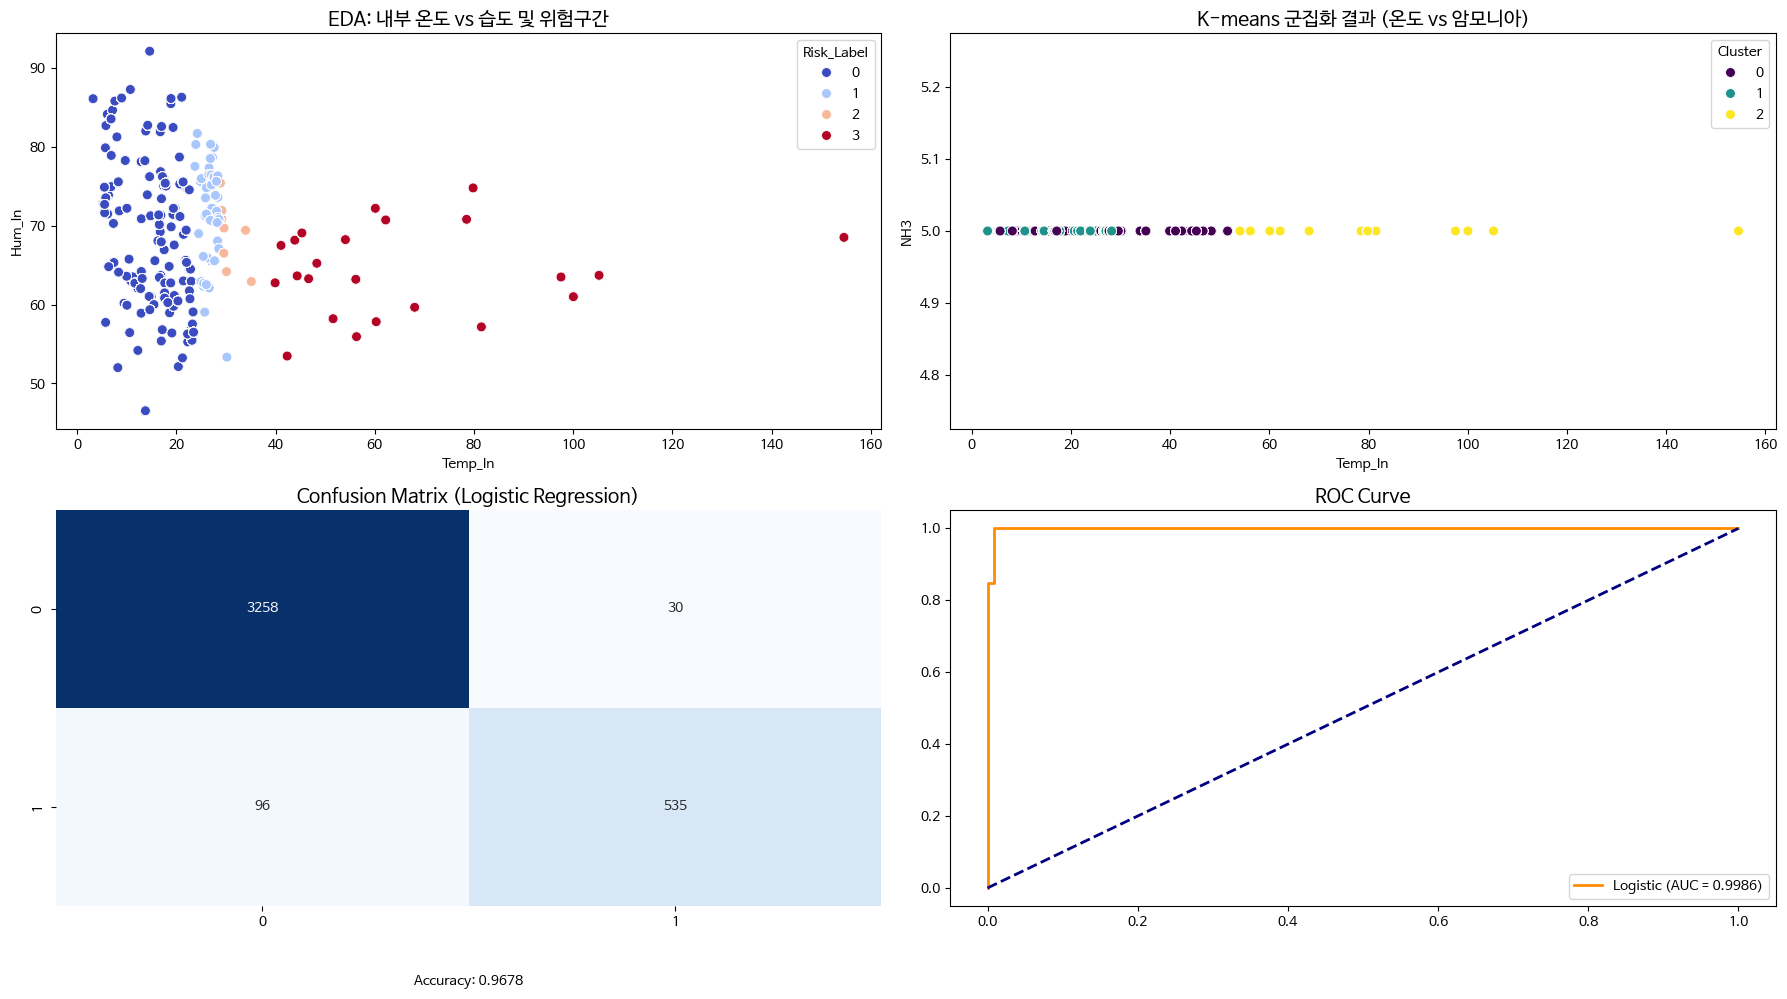


✅ 모든 분석 및 시각화가 완료되었습니다.


In [1]:
# 1. 한글 폰트 설치 및 라이브러리 임포트
# (주의: Colab에서 실행 시 이 셀을 실행 후 [런타임] -> [런타임 다시 시작]이 필요할 수 있습니다)
import os
import sys

# Colab 환경인지 확인 후 폰트 설치
if 'google.colab' in sys.modules:
    print("Google Colab 환경 감지: 한글 폰트를 설치합니다...")
    os.system("sudo apt-get install -y fonts-nanum")
    os.system("sudo fc-cache -fv")
    os.system("rm ~/.cache/matplotlib -rf")
else:
    print("로컬 환경입니다. 폰트가 설치되어 있다고 가정합니다.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io
from urllib.parse import quote
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

print("✅ 라이브러리 로드 및 폰트 설정 완료.")

# ==========================================
# 2. GitHub 데이터 다운로드 및 로드
# ==========================================

# GitHub 기본 경로 (Raw 데이터)
REPO_BASE_URL = "https://github.com/LGM-kr/math1/raw/main/"

# 다운로드할 파일 목록 (파일명에 공백이 있다면 정확히 입력해야 함)
filenames = {
    "env": "ICT데이터 환경관리기.xlsx", # 파일명 수정
    "ctrl": "ICT데이터 환경제어기.xlsx", # 파일명 수정
    "kma_zip": "OBS_ASOS_TIM.zip"
}

def download_file_from_github(filename):
    """GitHub에서 파일을 다운로드하여 로컬에 저장하는 함수"""
    # 한글 파일명 URL 인코딩 처리
    encoded_filename = quote(filename)
    url = REPO_BASE_URL + encoded_filename

    print(f"⬇️ 다운로드 시작: {filename}...")
    try:
        response = requests.get(url)
        response.raise_for_status() # 404 등 에러 체크

        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"✅ 다운로드 완료: {filename}")
        return filename
    except Exception as e:
        print(f"❌ 다운로드 실패 ({filename}): {e}")
        return None

def extract_zip(zip_filename):
    """ZIP 파일을 압축 해제하고 내부의 CSV 파일 경로를 반환"""
    print(f"📦 압축 해제 중: {zip_filename}...")
    try:
        with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
            zip_ref.extractall(".") # 현재 폴더에 압축 해제
            file_list = zip_ref.namelist()

        # 압축 해제된 파일 중 csv 찾기
        csv_files = [f for f in file_list if f.endswith('.csv') or f.endswith('.CSV')]
        if csv_files:
            print(f"✅ 압축 해제 완료. CSV 파일 발견: {csv_files[0]}")
            return csv_files[0] # 첫 번째 CSV 파일 반환
        else:
            print("❌ ZIP 파일 내에 CSV 파일이 없습니다.")
            return None
    except Exception as e:
        print(f"❌ 압축 해제 실패: {e}")
        return None

# --- 실행 로직 ---

try:
    print("⏳ 데이터 다운로드 및 처리 준비 중...")

    # 1. 파일 다운로드
    file_env_path = download_file_from_github(filenames["env"])
    file_ctrl_path = download_file_from_github(filenames["ctrl"]) # (분석에는 안 쓰이지만 요청에 따라 다운로드)
    file_kma_zip_path = download_file_from_github(filenames["kma_zip"])

    # 2. ZIP 파일 압축 해제 (기상청 데이터)
    file_kma_csv_path = extract_zip(file_kma_zip_path)

    if not file_env_path or not file_kma_csv_path:
        raise FileNotFoundError("필수 데이터 파일을 다운로드하거나 찾을 수 없습니다.")

    # 3. 데이터 로드 및 전처리 (기존 로직 유지)

    # 3-1. 환경관리기 데이터 로드
    df_env_raw = pd.read_excel(file_env_path)

    # 컬럼명 매핑 자동 찾기
    col_date = [c for c in df_env_raw.columns if '일자' in c][0]
    col_type = [c for c in df_env_raw.columns if '장비' in c][0]
    col_val = [c for c in df_env_raw.columns if '측정값' in c][0]

    # 피벗: 날짜를 기준으로 온도, 습도 등을 컬럼으로 변환
    df_env = df_env_raw.pivot_table(index=col_date, columns=col_type, values=col_val, aggfunc='mean').reset_index()
    df_env.columns.name = None

    # 영문 컬럼명으로 변경
    cols = df_env.columns
    col_map = {col_date: 'Date'}
    for c in cols:
        if '온도' in c: col_map[c] = 'Temp_In'
        if '습도' in c: col_map[c] = 'Hum_In'
        if 'NH3' in c or '암모니아' in c: col_map[c] = 'NH3'
        if 'CO2' in c: col_map[c] = 'CO2'

    df_env = df_env.rename(columns=col_map)
    df_env['Date'] = pd.to_datetime(df_env['Date'])

    # 3-2. 기상청 데이터 로드 (압축 해제된 CSV 사용)
    # 인코딩: 한글 윈도우 CSV는 보통 cp949, 실패 시 utf-8 시도
    try:
        df_kma = pd.read_csv(file_kma_csv_path, encoding='cp949')
    except:
        df_kma = pd.read_csv(file_kma_csv_path, encoding='utf-8')

    df_kma['일시'] = pd.to_datetime(df_kma['일시'])
    df_kma = df_kma[['일시', '기온(°C)', '습도(%)']].rename(columns={'일시':'Date', '기온(°C)':'Temp_Out', '습도(%)':'Hum_Out'})

    # 3-3. 데이터 병합 (Merge)
    df_final = pd.merge(df_env, df_kma, on='Date', how='inner')

    # 결측치 처리
    if 'NH3' not in df_final.columns: df_final['NH3'] = 5.0
    if 'CO2' not in df_final.columns: df_final['CO2'] = 600.0
    df_final = df_final.dropna(subset=['Temp_In', 'Hum_In'])

    print(f"✅ 데이터 전처리 완료: 총 {len(df_final)}건의 데이터가 준비되었습니다.")

except Exception as e:
    print(f"❌ 오류 발생: {e}")
    # 오류 발생 시 중단
    sys.exit()

# ==========================================
# 3. THI 계산 및 위험 라벨링
# ==========================================

def calc_thi_standard(temp, rh):
    return (1.8 * temp + 32) - (0.55 - 0.0055 * rh) * (1.8 * temp - 26)

def risk_labeling(row):
    thi = row['THI']
    nh3 = row['NH3']
    label = 0 # Safe
    if thi >= 90: label = 3 # Danger
    elif thi >= 80: label = 2 # Warning
    elif thi >= 72: label = 1 # Caution
    if nh3 > 15 and label < 2:
        label = 2
    return label

df_final['THI'] = df_final.apply(lambda x: calc_thi_standard(x['Temp_In'], x['Hum_In']), axis=1)
df_final['Risk_Label'] = df_final.apply(risk_labeling, axis=1)
df_final['Is_Danger'] = (df_final['Risk_Label'] >= 2).astype(int)

print("✅ THI 계산 및 위험 라벨링 완료.")
print("라벨 분포:\n", df_final['Risk_Label'].value_counts().sort_index())

# ==========================================
# 4. 머신러닝 모델링
# ==========================================

X = df_final[['Temp_In', 'Hum_In', 'NH3', 'CO2']]
y = df_final['Is_Danger']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters=3, random_state=42)
df_final['Cluster'] = kmeans.fit_predict(X_scaled)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
acc_lr = accuracy_score(y_test, y_pred_lr)
ce_loss = log_loss(y_test, y_prob_lr)

print(f"\n📊 [모델 성능 요약]")
print(f" - Naive Bayes 정확도: {acc_nb:.4f}")
print(f" - Logistic Regression 정확도: {acc_lr:.4f}")
print(f" - Cross Entropy Loss: {ce_loss:.4f}")

# ==========================================
# 5. 시각화
# ==========================================
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df_final, x='Temp_In', y='Hum_In', hue='Risk_Label', palette='coolwarm', s=50)
plt.title('EDA: 내부 온도 vs 습도 및 위험구간', fontsize=14)

plt.subplot(2, 2, 2)
sns.scatterplot(data=df_final, x='Temp_In', y='NH3', hue='Cluster', palette='viridis', s=50)
plt.title('K-means 군집화 결과 (온도 vs 암모니아)', fontsize=14)

plt.subplot(2, 2, 3)
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Logistic Regression)', fontsize=14)
plt.text(0.5, -0.2, f'Accuracy: {acc_lr:.4f}', ha='center', transform=plt.gca().transAxes)

plt.subplot(2, 2, 4)
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
auc_score = roc_auc_score(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f'Logistic (AUC = {auc_score:.4f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve', fontsize=14)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

print("\n✅ 모든 분석 및 시각화가 완료되었습니다.")